# Homework - 4
***
**Name**: Connor Larson

Worked with Devin Burke and Joe Theis
***

This assignment is due on Canvas by **5pm on Friday November 6th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

## Logistic Regression [10 - points]

In [3]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In [4]:
data2 = Numbers('data/mnist.pklz')

true label: 0


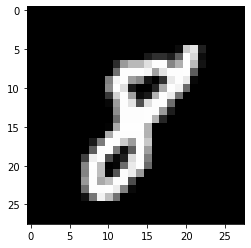

In [5]:
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
#view_digit(data2.train_x[0],data2.train_y[0])
view_digit(data2.train_x[1],data2.train_y[1])

In this homework you'll implement a Logistic Regression classifier to take drawings of either an eight or a nine and output corresponding label.
* Finish the `sigmoid` function to return the output of applying the sigmoid function the input parameter

* Finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly

In [6]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        """
        
        self.w = np.zeros(num_features)
        self.eta = eta
        
        
    def sgd_update(self, x_i, y):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """
 
        # TODO: Finish this function to do a single stochastic gradient descent update
        # and return the updated weight vector
        product = np.dot(x_i,self.w)
        self.w -=   x_i * (self.sigmoid(product) - y) * self.eta 
        return self.w
    
    def sigmoid(self, score, threshold = 20.0):
        """
        Prevent overflow of exp by capping activation at 20.
        :param score: A real valued number to convert into a number between 0 and 1
        """
        
        if abs(score) > threshold:
            score = threshold * np.sign(score)
            
            
        # TODO: Finish this function to return the output of applying the sigmoid
        # function to the input score (Please do not use external libraries)
        
        return 1 / (1 + np.exp(-score))
    
    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, computes the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """
 
        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = self.sigmoid(self.w.dot(x_i))
            if y == 1:
                logprob += np.log(p)
            else:
                logprob += np.log(1.0 - p)
 
            # Get accuracy
            if abs(y - p) < 0.5:
                num_right += 1
 
        return logprob, float(num_right) / float(len(examples_y))

**Q:** After completing the class above, loop over the training data and perform stochastic gradient descent for three different user-defined number of epochs, and five different values of eta range [1e-3, 1]. Train your model and do the following:

* Using the `progress` method, calculate the accuracy on the training and the valid sets every 100 iterations. Plot them on same graph for every comparison.

* Using `progress` method, calculate the accuracy on the validation set and store it for every epoch.

Don't forget to shuffle your training data after each epoch.

eta Value =  1


<IPython.core.display.Javascript object>


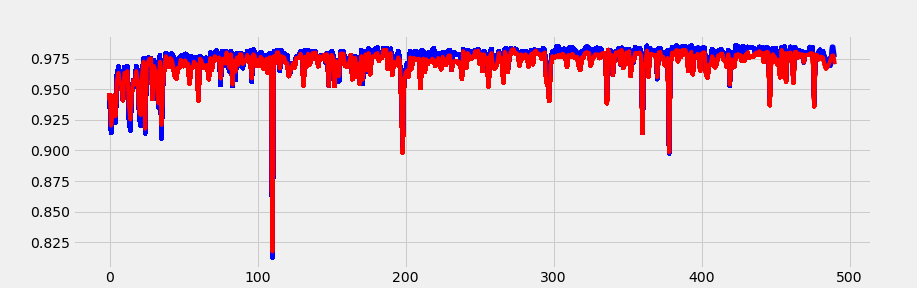

eta Value =  0.1


<IPython.core.display.Javascript object>


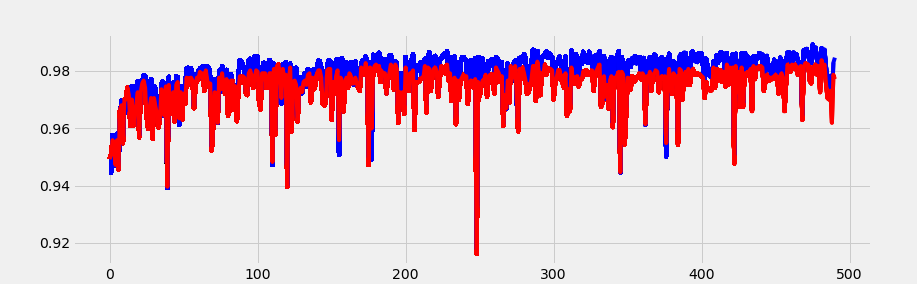

eta Value =  0.01


<IPython.core.display.Javascript object>


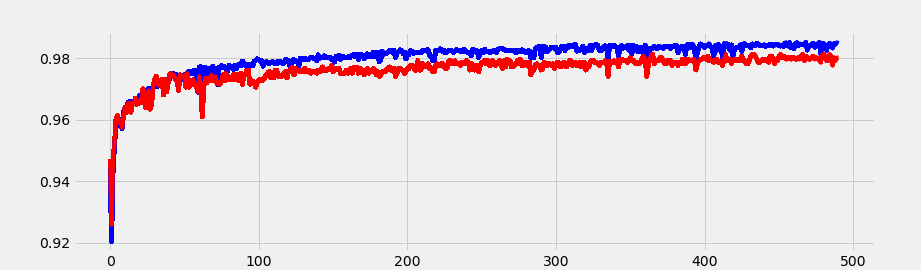

eta Value =  0.001


<IPython.core.display.Javascript object>


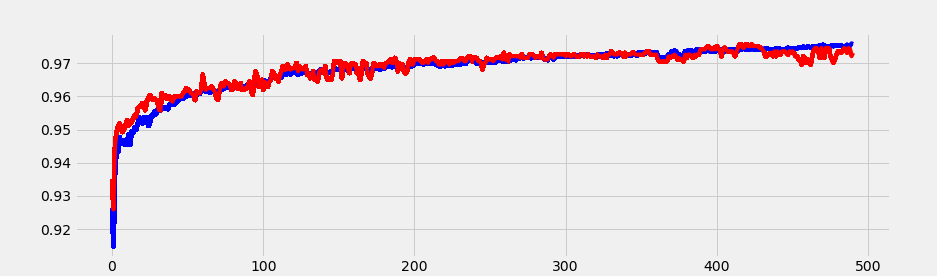

eta Value =  0.0001


<IPython.core.display.Javascript object>


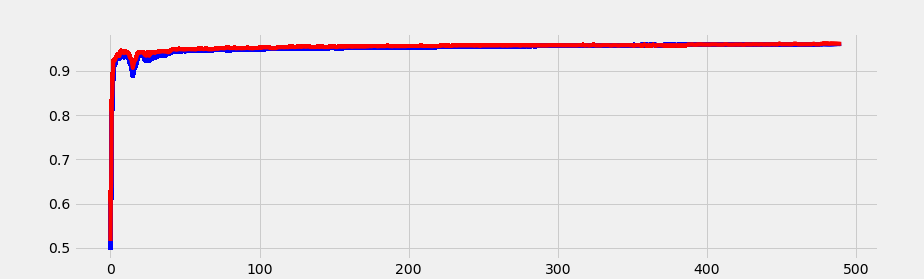

In [38]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

eta_val_list =[1,.1,.01,.001,.0001]
for eta_val in eta_val_list:
    print("eta Value = ", eta_val)
    LR = LogReg(data2.train_x.shape[1], eta_val)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.show()
    iteration = 0
    plot_count=0
    y_train_plot_vals=[]
    y_valid_plot_vals=[]
    x_plot_vals=[]

    for epoch in range(5):
        shuffled_indexes = np.random.permutation(data2.train_x.shape[0])
        temp_x= data2.train_x[shuffled_indexes]
        temp_y= data2.train_y[shuffled_indexes]
        for index in range(temp_x.shape[0]):
            LR.sgd_update(temp_x[index], temp_y[index])


            iteration += 1
            if iteration ==100: 
                # Plot the progress 
                x_plot_vals.append(plot_count)
                # training data 
                train_temp, train_accurracy = LR.progress(data2.train_x, data2.train_y)
                y_train_plot_vals.append(train_accurracy)
                # validation data
                valid_temp, valid_accurracy = LR.progress(data2.valid_x, data2.valid_y)
                y_valid_plot_vals.append(valid_accurracy)
                # plotting 
                ax.plot(x_plot_vals, y_train_plot_vals, color='b')
                ax.plot(x_plot_vals, y_valid_plot_vals, color='r')
                fig.canvas.draw()
                # counts updated  
                iteration =0
                plot_count+=1
    

epoch Value =  5


<IPython.core.display.Javascript object>


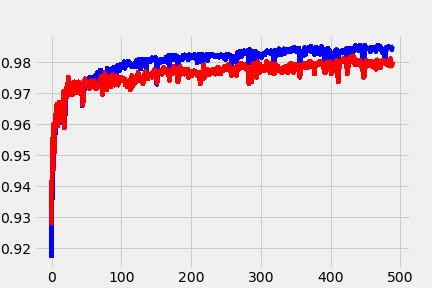

epoch Value =  10


<IPython.core.display.Javascript object>


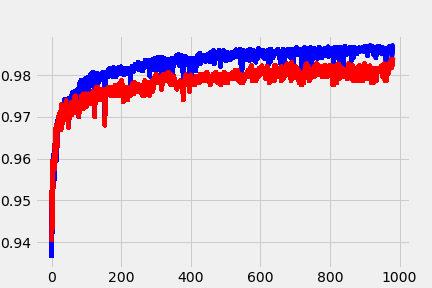

epoch Value =  15


<IPython.core.display.Javascript object>


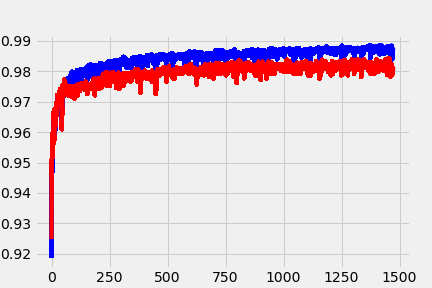

In [39]:
epoch_val_list =[5,10,15]
for epoch_val in epoch_val_list:
    print("epoch Value = ", epoch_val)
    LR = LogReg(data2.train_x.shape[1], .01)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.show()
    iteration = 0
    plot_count=0
    y_train_plot_vals=[]
    y_valid_plot_vals=[]
    x_plot_vals=[]

    for epoch in range(epoch_val):
        shuffled_indexes = np.random.permutation(data2.train_x.shape[0])
        temp_x= data2.train_x[shuffled_indexes]
        temp_y= data2.train_y[shuffled_indexes]
        for index in range(temp_x.shape[0]):
            LR.sgd_update(temp_x[index], temp_y[index])

            iteration += 1
            if iteration ==100: 
                # Plot the progress 
                x_plot_vals.append(plot_count)
                # training data 
                train_temp, train_accurracy = LR.progress(data2.train_x, data2.train_y)
                y_train_plot_vals.append(train_accurracy)
                # validation data
                valid_temp, valid_accurracy = LR.progress(data2.valid_x, data2.valid_y)
                y_valid_plot_vals.append(valid_accurracy)
                # plotting 
                ax.plot(x_plot_vals, y_train_plot_vals, color='b')
                ax.plot(x_plot_vals, y_valid_plot_vals, color='r')
                fig.canvas.draw()
                # counts updated  
                iteration =0
                plot_count+=1

**Q:** Describe the role of learning rate (eta) on the efficiency of convergence during training?

With a bigger Learning rate there is a much higher varaibility in the graphs. The higher learning rate means that the model can sometimes overshoot the minimum value during gradient descent which is why the accuracy will be high in one run and then on successive run will drop to a lower value. Having a smaller Learning rate the graph is smoother. This is becuase the model finds the minimum much faster and then as time goes on gets closer and closer to that point without overshooting the value. A lower learning rate is better becuase it does a much better job at finding the minimum without overshooting it. The best solution to the learning rate is having it be dynamic so that on the first iterations it takes large steps then by the final iterations it is making much smaller steps to avoid passing the minimum value. 

**Q:** Describe the role of the number of epochs on validation accuracy?

Having more epochs means that the model will run for longer and coupled with a smaller learning rate will get a much high accuracy score. The more passes the model has on the data in the form of more epochs means that the model will only get a higher accuracy score on the validation set. This is shown on the graphs by the red line approaching a higher accuracy score on the y axis. 

## Kernels [5 - points]

**Q:** We have seen two different definitions of kernels during the course:
* Definition 1: $K(x, x^{\prime})$ is a kernel if it can be written as an inner product $\phi(x)^T\phi(x^{\prime})$ for some feature mapping $x \rightarrow \phi(x)$.
* Definition 2: $K(x, x^{\prime})$ is a kernel if for any finite set of training examples $x_1, \cdots, x_n$, the $n \times n$ matrix __K__ such that $K_{ij} = K(x_i, x_j)$ is positive semidefinite

Show that definition 1 implies definition 2.

_Hint:_ you could show this by proving that for real numbers $\alpha_1, \cdots, \alpha_n$ and points $x_1, \cdots, x_n$,
$$ \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jK(x_i, x_j) \geq 0$$
if the kernel can be written as $K(x, x^{\prime}) = \phi(x)^T\phi(x^{\prime})$

Starting with the above infromation from the hint we have 

$ \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jK(x_i, x_j) $

We then substitute the Definition of a kernal into that equation to get 

$K(x, x^{\prime}) = \phi(x)^T\phi(x^{\prime})$

$ = \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_j \phi(x)^T\phi(x^{\prime}) $

From here we can rearrange the terms to get the sums of I and J together to the following. 

$= (\sum_{i=1}^n \alpha_i \phi(x))^T (\sum_{j=1}^n \alpha_j \phi(x^{\prime})) $


Because I and J both go to n and A and X can be any real number we can combine the two terms into the following. 

$= (\sum_{i=1}^n \alpha_i \phi(x))^2 $

No matter what the value of a and X is the square on the whole thing indicates that this value will always be postive and symetric. Which hence implies that the Kernel is indeed postive semidefinite. 


**Q:** One way to construct kernels is to build them from simpler ones. We have already seen three possible "composition rules": assuming $K_1(x, x^\prime)$ and $K_2(x, x^\prime)$ are kernels, then the following are also kernels:
* (scaling) $f(x)K_1(x, x^\prime)f(x^\prime), \ f(x) \in \mathbb R$
* (sum) $K_1(x, x^\prime) + K_2(x, x^\prime)$
* (product) $K_1(x, x^\prime)K_2(x, x^\prime)$

(a) Let $\phi^{(1)}(x)$ and $\phi^{(2)}(x)$ be the feature vectors corresponding to kernels $K_1(x, x^\prime)$ and $K_2(x, x^\prime)$, respectively. These feature vectors may be of different length. Show that the product $K_1(x, x^\prime)K_2(x, x^\prime)$ is a kernel by showing that its feature vectors are given by $\phi(x)$ whose $(i, j)^{th}$ component (double indexed vector) is $\phi_i^{(1)}(x)\phi_j^{(2)}(x)$.

(b) Use the composition rules to build a normalized cubic polynomial kernel defined as:
$$K(x, x^\prime) = \bigg( 1 + \bigg(\frac{x}{||x||}\bigg)^T\bigg(\frac{x^\prime}{||x^\prime||}\bigg)\bigg)^3$$

You can assume that you already have a constant kernel $K_0(x, x^\prime) = 1$ and a linear kernel $K_1(x, x^\prime) = x^Tx^\prime$. Identify which rules you are employing at each step.

(a) Starting with the given information and the definition of the product of two kernels we get 

$K_1(x, x^\prime)K_2(x, x^\prime)$

From here we can substitute $\phi^{(1)}(x)$ and $\phi^{(2)}(x)$  into this equation to represent the dot product of the two values and get. 

$ = (\phi^{(1)}(x)^T \phi^{(1)}(x^\prime)) (\phi^{(2)}(x)^T \phi^{(2)}(x^\prime))   $

From here we rewrite the dot product to the sum of products between the $\phi $ s which yeilds 

$ = (\sum_{i=1}^n \phi_i^{(1)}(x) \phi_i^{(1)}(x^\prime)) (\sum_{j=1}^n \phi_j^{(2)}(x) \phi_j^{(2)}(x^\prime) )$

Next we distribute the terms

$ = \sum_{i=1}^n \sum_{j=1}^n \phi_i^{(1)}(x) \phi_i^{(1)}(x^\prime) \phi_j^{(2)}(x) \phi_j^{(2)}(x^\prime)  $

We can combine the sums to get one big sum of 

$ = \sum_{l=1}^{n*n} \phi_l^{(1)}(x)\phi_l^{(2)}(x) $

Which can be rewritten as the dot product of phi 1 and 2 

$ = \phi^{(1)}(x)^T \phi^{(2)}(x) $

From this we show that the the Product of kernal 1 and kernal 2 is $\phi_i^{(1)}(x)\phi_j^{(2)}(x)$

(b) Starting with Kernel 1 from the question 

$K_1(x, x^\prime) = x^Tx^\prime$ 

We can define our scaling function as $f(x) = \frac{1}{||x||} $ 

and then by the definitoon of scaling we have  $f(x) * K_1 * f(x^\prime) $

We can define this new kernal as $K_2$  

From here we can use the definition of Sum to get $1+ K_2$ Which we can define as $K_3$

From here we can use the definition of product to get $K_3 *K_3 *K_3 $ Which can be written as a polynopmial of $K_3^3$

This in turn gives us the final Kernel of 
$( 1 + (\frac{x}{||x||})^T(\frac{x^\prime}{||x^\prime||}))^3$


## Kernel Perceptron [5 points]

Implement the Kernel Perceptron as described in the lecture using different kernel functions. Use the training and test data provided below to train and test your implementation. Report the error rate for each kernel function.

In [101]:
from scipy.io import loadmat
class Data:
    def __init__(self):
        ff = lambda x,y : loadmat(x)[y]
        
        self.X_train = ff("data/iris_3/train_data.mat", "train_data")
        self.y_train = ff("data/iris_3/train_labels.mat", "train_labels").flatten()
        
        self.X_test = ff("data/iris_3/test_data.mat", "test_data")
        self.y_test = ff("data/iris_3/test_labels.mat", "test_labels").flatten()

**A:** Implement the kernel functions below:

In [124]:
import numpy as np
from numpy import linalg

def linear_kernel(x1, x2):
    
    return np.dot(x1,x2)
    
def polynomial_kernel(x, y, p = 3):
    
    #p = degree of the polynomial
    return (1+np.dot(x,y))**p
    
def gaussian_kernel(x, y, sigma = 0.5):
    
    return np.exp((-np.linalg.norm(x-y)**2)/(2*(sigma**2)))

**B:** Implement the following methods of the `KernelPerceptron` class. The $init$ takes also as input the kernel to use. You are allowed to introduce new class variables/methods.

* Implement the `fit` method. Taking as input the training data, it learns the model parameters
* Implement the `predict` method which takes as input new examples and returns the estimated label 

In [125]:
class KernelPerceptron:
    def __init__(self, kernel = linear_kernel, Niter = 1):
        self.kernel = kernel
        self.Niter = Niter
        self.support_vector_x = None
        self.support_vector_y = None
        self.threshold = 1e-5
        
    def fit(self, X, y):
        #TO DO
        self.alpha = np.zeros(X.shape[0])
        
        kernel_matrix = np.zeros((X.shape[0], X.shape[0]))
        for index_one in range(X.shape[0]):
            for index_two in range(X.shape[0]):
                kernel_matrix[index_one,index_two] = self.kernel(X[index_one], X[index_two])
        
        for iterator in range(self.Niter):
            for index in range(X.shape[0]):
                y_predict = np.sign(np.dot(kernel_matrix[:,index], (self.alpha * y)))
                if y[index] != y_predict:
                    self.alpha[index] += 1
        
        
        sv = self.alpha > self.threshold       
        self.support_vector_x = X[sv]
        self.support_vector_y = y[sv]
        self.alpha = self.alpha[sv]
    
    def predict(self, X):
        #TO DO
        y_prediction = np.zeros(X.shape[0])
        for index in range(X.shape[0]):
            total = 0
            for index_two in range(self.alpha.shape[0]):
                total += self.kernel(X[index], self.support_vector_x[index_two]) * self.support_vector_y[index_two] * self.alpha[index_two]  
            y_prediction[index] = total
        
        return np.sign(y_prediction)
    
    
    

**C:** Report the test error for each kernel function for `Niter = 20`

In [127]:
data = Data()

KP = KernelPerceptron(linear_kernel, 20)
KP.fit(data.X_train, data.y_train)

predict_vals = KP.predict(data.X_test)
# correct = np.sum(predict_vals == data.y_test)
correct = 0 
for index in range(predict_vals.shape[0]):
    if predict_vals[index] == data.y_test[index]:
        correct+=1 

print("linear_kernel accuracy = ", correct/data.y_test.shape[0], "error Rates= ",1-(correct/data.y_test.shape[0]) )

KP = KernelPerceptron(polynomial_kernel, 20)
KP.fit(data.X_train, data.y_train)

predict_vals = KP.predict(data.X_test)
correct = 0 
for index in range(predict_vals.shape[0]):
    if predict_vals[index] == data.y_test[index]:
        correct+=1 
print("polynomial_kernel accuracy = ", correct/data.y_test.shape[0], "error Rates= ",1-(correct/data.y_test.shape[0]) )

KP = KernelPerceptron(gaussian_kernel, 20)
KP.fit(data.X_train, data.y_train)

predict_vals = KP.predict(data.X_test)
correct = 0 
for index in range(predict_vals.shape[0]):
    if predict_vals[index] == data.y_test[index]:
        correct+=1 
print("gaussian_kernel accuracy = ", correct/data.y_test.shape[0], "error Rates= ",1-(correct/data.y_test.shape[0]) )

linear_kernel accuracy =  0.6 error Rates=  0.4
polynomial_kernel accuracy =  0.9333333333333333 error Rates=  0.06666666666666665
gaussian_kernel accuracy =  0.9333333333333333 error Rates=  0.06666666666666665


The accuracy rates and error rates are reported above. 
The linear Kernel likely performs not as good becuase the data is not linearly seperatable. 
Where as the polynomial and Gaussian kernels performed much better on the same test data. 


## Support Vector Machines [10 points]

**PART A**: 
​
 * Given a weight vector, implement the *find_support* function that returns the indices of the support vectors.
 * Given a weight vector, implement the *find_slack* function that returns the indices of the vectors with nonzero slack.
 * Given the alpha dual vector, implement the *weight_vector* function that returns the corresponding weight vector.

In [130]:
import numpy as np

kINSP = np.array([(1, 8, +1),
               (7, 2, -1),
               (6, -1, -1),
               (-5, 0, +1),
               (-5, 1, -1),
               (-5, 2, +1),
               (6, 3, +1),
               (6, 1, -1),
               (5, 2, -1)])

kSEP = np.array([(-2, 2, +1),    # 0 - A
              (0, 4, +1),     # 1 - B
              (2, 1, +1),     # 2 - C
              (-2, -3, -1),   # 3 - D
              (0, -1, -1),    # 4 - E
              (2, -3, -1),    # 5 - F
              ])


def weight_vector(x, y, alpha):
    """
    Given a vector of alphas, compute the primal weight vector w.
    The vector w should be returned as an Numpy array.
    """

    w = np.zeros(x.shape[1])
    # YOUR CODE HERE
    for index in range(x.shape[0]):
        w += x[index] * y[index] * alpha[index]
    return w



def find_support(x, y, w, b, tolerance=0.001):
    """
    Given a set of training examples and primal weights, return the indices
    of all of the support vectors as a set.
    """

    support = set()
    # YOUR CODE HERE
    for index in range(x.shape[0]):
        condition = (np.dot(w, x[index]) + b) * y[index]
        if (condition < 1 + tolerance) and (condition > 1 - tolerance):
            support.add(index)
    return support
    



def find_slack(x, y, w, b):
    """
    Given a set of training examples and primal weights, return the indices
    of all examples with nonzero slack as a set.
    """

    slack = set()
    # YOUR CODE HERE
    for index in range(x.shape[0]):
        condition = (np.dot(w, x[index]) + b) * y[index]
        if condition < 1:
            slack.add(index)
    return slack

In [27]:
%run -i tests/tests.py

....
----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK


**PART B**: 

In this problem, you are going to get familiar with important practical functions in scikit-learn such as grid search, and cross validation. You will experiment with these using support vector machines.

Note that grid search can take some time on your laptop, so make sure that your code is correct with a small subset of the training data and search a reasonable number of options.

* Use the Sklearn implementation of support vector machines to train a classifier to distinguish 8s and 9s from `Numbers` class from the Logistic Regression problem
* Experiment with linear, polynomial, and RBF kernels. In each case, perform a GridSearch to help determine optimal hyperparameters for the given model (e.g. C for linear kernel, C and p for polynomial kernel, and C and  for RBF). Comment on the experiments you ran and optimal hyperparameters you found.
Hint: http://scikit-learn.org/stable/modules/grid_search.html
* Comment on classification performance for each model for optimal parameters by testing on a hold-out set.

In [90]:
# Create GridSearchCV with pipeline and grid search parameters, scoring as accuracy.
# for example grid_svm = GridSearchCV(SVC(), param_grid, cv, scoring="accuracy")
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# YOUR CODE HERE
# linear=Pipeline([ ('svm', SVC(kernel='linear'))])
# poly=Pipeline([ ('svm', SVC(kernel='poly'))])
# rbf=Pipeline([ ('svm', SVC(kernel='rbf'))])
# pipe = [linear,poly,rbf]

C = [0.001, 0.01, 0.1, 1, 10]
gamma = [0.001, 0.01, 0.1, 1]
degree=[2,3,5]
param_grid = [{'C': C}, {'C': C,'degree': degree , 'gamma': gamma},{'C': C, 'gamma' : gamma} ]

grid_svm1 = GridSearchCV(SVC(kernel='linear'), param_grid[0], cv=3, scoring="accuracy")
grid_svm1.fit(data2.train_x, data2.train_y)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, scoring='accuracy')

In [91]:
grid_svm2 = GridSearchCV(SVC(kernel='poly'), param_grid[1], cv=3, scoring="accuracy")
grid_svm2.fit(data2.train_x, data2.train_y)

GridSearchCV(cv=3, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3, 5],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [92]:
grid_svm3 = GridSearchCV(SVC(kernel='rbf'), param_grid[2], cv=3, scoring="accuracy")
grid_svm3.fit(data2.train_x, data2.train_y)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [93]:
# linear 
print("linear")
print(grid_svm1.best_params_) 
print("best cv score:")
print(grid_svm1.best_score_)
#poly 
print("poly")
print(grid_svm2.best_params_)
print("best cv score:")
print(grid_svm2.best_score_)
#rbf 
print("rbf")
print(grid_svm3.best_params_)
print("best cv score:")
print(grid_svm3.best_score_)

linear
{'C': 0.1}
best cv score:
0.9811799260990594
poly
{'C': 0.001, 'degree': 2, 'gamma': 1}
best cv score:
0.9931841404224682
rbf
{'C': 10, 'gamma': 0.01}
best cv score:
0.9931841714722398


In [94]:
def report_results(model, X, y):
    pred = model.predict(X)        
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [95]:
report_results(grid_svm1.best_estimator_, data2.valid_x, data2.valid_y)

{'f1': 0.9849036959916709,
 'acc': 0.9852791878172589,
 'precision': 0.9854166666666667,
 'recall': 0.9843912591050988}

In [96]:
report_results(grid_svm2.best_estimator_, data2.valid_x, data2.valid_y)

{'f1': 0.9937565036420395,
 'acc': 0.9939086294416244,
 'precision': 0.9937565036420395,
 'recall': 0.9937565036420395}

In [97]:
report_results(grid_svm3.best_estimator_, data2.valid_x, data2.valid_y)

{'f1': 0.9942678478374154,
 'acc': 0.9944162436548223,
 'precision': 0.9958246346555324,
 'recall': 0.9927159209157128}

The accuracy scores are reported above in the order of linear, poly, and RBF. 
All 3 kernels perform very well with the Polynomial kernal performing the best with .001 better accuracy than the RBF kernel. 
This shows the power of kernel SVM as all 3 models were able to attain over 98% accuracy on the validation data after finding the optimum parameters which is a very good result.  